Generate Sudokos

In [ ]:
import numpy as np
import random

class SudokuGenerator:
    @classmethod
    def str_board(cls, board):
        '''Returns a formatted string representation of the board'''
        str_board = ''
        for i, row in enumerate(board):
            if i > 0 and i % 3 == 0:
                str_board += '-' * (len(board) * 2 + 5) + '\n'
            for j, num in enumerate(row):
                if j > 0 and j % 3 == 0:
                    str_board += '| '
                str_board += f'{num} '
            str_board += '\n'
        return str_board

    @classmethod
    def generate_board(cls, size, fill_percentage=0.5):
        '''Generates a Sudoku board with random 50% filled boxes'''
        if size % 3 != 0 or size < 3:
            raise ValueError("Size must be a multiple of 3 and greater than or equal to 3.")

        board = np.zeros((size, size), dtype=int)

        # Fill the main diagonal of each 3x3 subgrid with random numbers
        for i in range(0, size, 3):
            cls.fill_subgrid(board, i)

        # Solve the partially filled board to create a valid Sudoku
        if not cls.solve(board):
            raise ValueError("Failed to generate a valid Sudoku.")

        # Randomly clear 50% of the filled boxes
        num_to_clear = int(fill_percentage * size * size)
        for _ in range(num_to_clear):
            i, j = random.randint(0, size - 1), random.randint(0, size - 1)
            while board[i, j] == 0:
                i, j = random.randint(0, size - 1), random.randint(0, size - 1)
            board[i, j] = 0

        return board

    @classmethod
    def fill_subgrid(cls, board, start_row):
        '''Fills the main diagonal of a 3x3 subgrid with random numbers'''
        numbers = list(range(1, len(board) + 1))
        for i in range(start_row, start_row + 3):
            random.shuffle(numbers)
            for j in range(start_row, start_row + 3):
                board[i, j] = numbers.pop()

    @classmethod
    def solve(cls, board):
        '''Solves the Sudoku board using backtracking'''
        find_result = cls.find_empty(board)
        if find_result is None:
            return True
        else:
            i, j = find_result

        for num in range(1, len(board) + 1):
            if cls.valid(board, num, (i, j)):
                board[i, j] = num
                if cls.solve(board):
                    return True
                board[i, j] = 0

        return False

    @classmethod
    def find_empty(cls, board):
        '''Finds an empty cell on the board'''
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i, j] == 0:
                    return i, j
        return None

    @classmethod
    def valid(cls, board, num, pos):
        '''Checks if placing a number in a position is valid'''
        row, col = pos

        # Check row and column
        if num in board[row, :] or num in board[:, col]:
            return False

        # Check 3x3 subgrid
        subgrid_start_row, subgrid_start_col = 3 * (row // 3), 3 * (col // 3)
        subgrid = board[subgrid_start_row:subgrid_start_row + 3, subgrid_start_col:subgrid_start_col + 3]
        if num in subgrid:
            return False

        return True

# Generate and print 10 Sudoku grids
for _ in range(10):
    sudoku_board = SudokuGenerator.generate_board(9, fill_percentage=0.5)
    print("\nSudoku 9x9 with 50% filled values:")
    print(SudokuGenerator.str_board(sudoku_board))



Sudoku 9x9 with 50% filled values:
0 6 0 | 2 0 5 | 0 0 0 
0 8 7 | 0 0 0 | 0 0 6 
2 5 0 | 6 8 7 | 1 0 0 
-----------------------
5 1 0 | 9 0 3 | 7 0 8 
0 0 0 | 1 7 4 | 9 6 5 
9 0 6 | 5 2 0 | 4 3 0 
-----------------------
6 0 1 | 0 0 2 | 0 0 0 
8 9 2 | 0 5 6 | 0 1 0 
0 0 5 | 0 9 0 | 0 0 0 


Sudoku 9x9 with 50% filled values:
3 7 6 | 4 0 2 | 0 5 0 
0 0 0 | 3 0 6 | 7 4 0 
0 0 0 | 0 0 0 | 0 3 6 
-----------------------
0 0 7 | 8 0 0 | 4 0 2 
0 6 0 | 1 0 9 | 3 7 0 
0 0 0 | 2 7 0 | 0 1 5 
-----------------------
6 9 3 | 5 8 0 | 0 2 7 
7 0 2 | 6 0 0 | 9 8 4 
8 4 0 | 0 2 0 | 0 0 0 


Sudoku 9x9 with 50% filled values:
2 0 0 | 3 5 0 | 0 7 9 
5 0 0 | 8 0 0 | 2 6 4 
6 0 0 | 0 2 0 | 1 0 5 
-----------------------
0 0 2 | 0 3 0 | 0 0 7 
0 4 6 | 0 0 0 | 5 0 1 
0 5 0 | 6 0 8 | 4 2 3 
-----------------------
4 0 0 | 0 0 7 | 0 0 2 
8 0 1 | 9 4 0 | 7 0 0 
9 7 0 | 1 6 0 | 3 0 8 


Sudoku 9x9 with 50% filled values:
5 0 0 | 0 1 6 | 0 4 8 
0 2 7 | 0 4 0 | 1 5 0 
0 1 0 | 5 9 7 | 0 0 6 
-------------------

Back Tracking

Solving time for grid 1: 0.031 seconds
Solved grid 1:
1 2 3 | 4 5 6 | 7 8 9
4 5 6 | 7 8 9 | 1 2 3
7 8 9 | 1 2 3 | 4 5 6
- - - - - - - - - - - 
2 1 4 | 3 6 5 | 8 9 7
3 6 5 | 8 9 7 | 2 1 4
8 9 7 | 2 1 4 | 3 6 5
- - - - - - - - - - - 
5 3 1 | 6 4 2 | 9 7 8
6 4 2 | 9 7 8 | 5 3 1
9 7 8 | 5 3 1 | 6 4 2

Solving time for grid 2: 0.337 seconds
Solved grid 2:
8 1 2 | 3 5 4 | 6 7 9
4 9 3 | 6 1 7 | 2 8 5
6 7 5 | 2 9 8 | 1 4 3
- - - - - - - - - - - 
1 5 4 | 7 2 3 | 8 9 6
3 6 9 | 8 4 5 | 7 2 1
2 8 7 | 1 6 9 | 5 3 4
- - - - - - - - - - - 
9 4 1 | 5 7 2 | 3 6 8
5 2 8 | 4 3 6 | 9 1 7
7 3 6 | 9 8 1 | 4 5 2

Solving time for grid 3: 3.946 seconds
Solved grid 3:
8 1 2 | 7 5 3 | 6 4 9
9 4 3 | 6 8 2 | 1 7 5
6 7 5 | 4 9 1 | 2 8 3
- - - - - - - - - - - 
1 5 4 | 2 3 7 | 8 9 6
3 6 9 | 8 4 5 | 7 2 1
2 8 7 | 1 6 9 | 5 3 4
- - - - - - - - - - - 
5 2 1 | 9 7 4 | 3 6 8
4 3 8 | 5 2 6 | 9 1 7
7 9 6 | 3 1 8 | 4 5 2

Solving time for grid 4: 0.102 seconds
Solved grid 4:
8 1 2 | 7 5 3 | 6 4 9
9 4 3 | 6 8 2 | 1 7 5
6 7 5

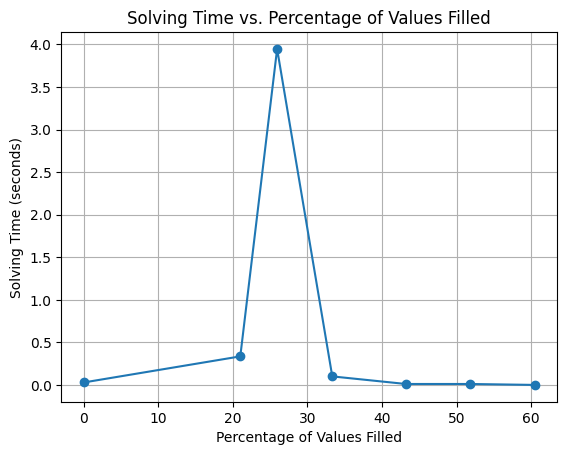

In [ ]:
from random import shuffle
import time
import matplotlib.pyplot as plt
import numpy as np


class Sudoku:
    '''Sudoku class for solving and generating boards'''

    @classmethod
    def str_board(cls, board):
        '''Returns a board in string format'''
        str_board = ''
        for y in range(len(board)):
            if y in [3, 6]:
                str_board += '- ' * 11 + '\n'
            for x in range(len(board[y])):
                if x in [3, 6]:
                    str_board += '| '
                if x == 8:
                    str_board += str(board[y][x]) + '\n'
                else:
                    str_board += str(board[y][x]) + ' '
        return str_board

    @classmethod
    def find_empty(cls, board):
        '''Find and returns an empty cell if any, else returns None'''
        for y in range(len(board)):
            for x in range(len(board[0])):
                if board[y][x] == 0:
                    return y, x
        return None

    @classmethod
    def valid(cls, board, num, pos):
        '''Returns if a number is valid on a position on the board'''
        for x in range(len(board[0])):
            if board[pos[0]][x] == num and pos[1] != x:
                return False

        for y in range(len(board)):
            if board[y][pos[1]] == num and pos[0] != y:
                return False

        box_y = (pos[0] // 3) * 3
        box_x = (pos[1] // 3) * 3

        for y in range(box_y, box_y + 3):
            for x in range(box_x, box_x + 3):
                if board[y][x] == num and (y, x) != pos:
                    return False

        return True

    @classmethod
    def solve(cls, board):
        '''Solves a given board and returns the board. Returns False if the board is not solvable'''
        find_result = cls.find_empty(board)
        if not find_result:
            return board
        else:
            y, x = find_result

        for num in range(1, 10):
            if Sudoku.valid(board, num, (y, x)):
                board[y][x] = num
                if Sudoku.solve(board):
                    return board
                board[y][x] = 0
        return False

    @classmethod
    def create_empty(cls, board, number):
        '''Creates empty spaces in board according to the number, returns the board'''
        coors = [(y, x) for y in range(9) for x in range(9)]
        shuffle(coors)
        for idx in range(number):
            y, x = coors[idx]
            board[y][x] = 0
        return board

    @classmethod
    def generate_board(cls):
        '''Generates a random Sudoku board and returns it.'''
        numbers = list(range(1, 10))
        board = [[0 for _ in range(9)] for _ in range(9)]
        for y in range(len(board)):
            for x in range(len(board[0])):
                shuffle(numbers)
                for num in numbers:
                    if Sudoku.valid(board, num, (y, x)):
                        board[y][x] = num

                    if Sudoku.solve(board):
                        break

                    board[y][x] = num
        return board

def solve_and_measure_time(board):
    '''Solves a Sudoku board and measures the time taken'''
    solver = Sudoku()
    t1 = time.time()
    solved_board = solver.solve(board)
    t2 = time.time()
    solving_time = round(t2 - t1, 3)
    return solving_time, solved_board

# List of Sudoku grids with different percentages of filled values
grids = [
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 6, 0, 0, 0, 0, 0],
        [0, 7, 0, 0, 9, 0, 0, 0, 0],
        [0, 5, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 6, 0, 0, 0, 0, 0],
        [0, 7, 0, 0, 9, 0, 2, 0, 0],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 5, 0, 0, 0, 1, 0],
        [0, 9, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 5, 0, 0, 0, 1, 0],
        [0, 9, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [5, 2, 1, 0, 0, 0, 0, 6, 8],
        [4, 3, 8, 5, 0, 0, 0, 1, 0],
        [7, 9, 6, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [1, 5, 4, 2, 3, 7, 8, 9, 6],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [5, 2, 1, 0, 0, 0, 0, 6, 8],
        [4, 3, 8, 5, 0, 0, 0, 1, 0],
        [7, 9, 6, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [1, 5, 4, 2, 3, 7, 8, 9, 6],
        [0, 0, 0, 0, 4, 5, 7, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 3, 4],
        [5, 2, 1, 0, 0, 0, 3, 6, 8],
        [4, 3, 8, 5, 0, 0, 9, 1, 7],
        [7, 9, 6, 0, 0, 0, 4, 5, 2]
    ]
]

# List of percentages of filled values for each Sudoku grid
percentages = [0.00, 20.99, 25.93, 33.33, 43.21, 51.85, 60.49]

# Solve each Sudoku grid and measure the time taken
solving_times = []
solved_grids = []
for idx, grid in enumerate(grids):
    solving_time, solved_board = solve_and_measure_time(grid)
    solving_times.append(solving_time)
    solved_grids.append(solved_board)
    print(f"Solving time for grid {idx + 1}: {solving_time} seconds")
    print(f"Solved grid {idx + 1}:\n{Sudoku.str_board(solved_board)}")

# Plot the line graph
plt.plot(percentages, solving_times, marker='o')
plt.xlabel('Percentage of Values Filled')
plt.ylabel('Solving Time (seconds)')
plt.title('Solving Time vs. Percentage of Values Filled')
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import random

class SudokuGenerator:
    @classmethod
    def str_board(cls, board):
        '''Returns a formatted string representation of the board'''
        str_board = ''
        for i, row in enumerate(board):
            if i > 0 and i % 3 == 0:
                str_board += '-' * (len(board) * 2 + 5) + '\n'
            for j, num in enumerate(row):
                if j > 0 and j % 3 == 0:
                    str_board += '| '
                str_board += f'{num} '
            str_board += '\n'
        return str_board

    @classmethod
    def generate_board(cls, size, fill_percentage=0.5):
        '''Generates a Sudoku board with random 50% filled boxes'''
        if size % 3 != 0 or size < 3:
            raise ValueError("Size must be a multiple of 3 and greater than or equal to 3.")

        board = np.zeros((size, size), dtype=int)

        # Fill the main diagonal of each 3x3 subgrid with random numbers
        for i in range(0, size, 3):
            cls.fill_subgrid(board, i)

        # Solve the partially filled board to create a valid Sudoku
        if not cls.solve(board):
            raise ValueError("Failed to generate a valid Sudoku.")

        # Randomly clear 50% of the filled boxes
        num_to_clear = int(fill_percentage * size * size)
        for _ in range(num_to_clear):
            i, j = random.randint(0, size - 1), random.randint(0, size - 1)
            while board[i, j] == 0:
                i, j = random.randint(0, size - 1), random.randint(0, size - 1)
            board[i, j] = 0

        return board

    @classmethod
    def fill_subgrid(cls, board, start_row):
        '''Fills the main diagonal of a 3x3 subgrid with random numbers'''
        numbers = list(range(1, len(board) + 1))
        for i in range(start_row, start_row + 3):
            random.shuffle(numbers)
            for j in range(start_row, start_row + 3):
                board[i, j] = numbers.pop()

    @classmethod
    def solve(cls, board):
        '''Solves the Sudoku board using backtracking'''
        find_result = cls.find_empty(board)
        if find_result is None:
            return True
        else:
            i, j = find_result

        for num in range(1, len(board) + 1):
            if cls.valid(board, num, (i, j)):
                board[i, j] = num
                if cls.solve(board):
                    return True
                board[i, j] = 0

        return False

    @classmethod
    def find_empty(cls, board):
        '''Finds an empty cell on the board'''
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i, j] == 0:
                    return i, j
        return None

    @classmethod
    def valid(cls, board, num, pos):
        '''Checks if placing a number in a position is valid'''
        row, col = pos

        # Check row and column
        if num in board[row, :] or num in board[:, col]:
            return False

        # Check 3x3 subgrid
        subgrid_start_row, subgrid_start_col = 3 * (row // 3), 3 * (col // 3)
        subgrid = board[subgrid_start_row:subgrid_start_row + 3, subgrid_start_col:subgrid_start_col + 3]
        if num in subgrid:
            return False

        return True

# Generate and print 10 Sudoku grids
for _ in range(50):
    sudoku_board = SudokuGenerator.generate_board(9, fill_percentage=0.5)
    print("\nSudoku 9x9 with 50% filled values:")
    print(SudokuGenerator.str_board(sudoku_board))

    # Solve the generated Sudoku using backtracking
    solved_board = sudoku_board.copy()
    if SudokuGenerator.solve(solved_board):
        print("\nSolved Sudoku:")
        print(SudokuGenerator.str_board(solved_board))
    else:
        print("\nFailed to solve the Sudoku.")



Sudoku 9x9 with 50% filled values:
0 8 6 | 0 0 1 | 5 9 0 
2 7 0 | 0 0 0 | 6 8 0 
4 5 0 | 0 6 7 | 1 2 0 
-----------------------
0 0 0 | 7 0 0 | 0 6 0 
6 2 0 | 0 0 4 | 0 0 9 
1 9 8 | 6 3 5 | 7 4 2 
-----------------------
7 6 0 | 0 1 2 | 9 3 0 
0 0 0 | 9 0 0 | 0 0 5 
0 1 0 | 3 0 0 | 4 0 0 


Solved Sudoku:
3 8 6 | 2 4 1 | 5 9 7 
2 7 1 | 5 9 3 | 6 8 4 
4 5 9 | 8 6 7 | 1 2 3 
-----------------------
5 3 4 | 7 2 9 | 8 6 1 
6 2 7 | 1 8 4 | 3 5 9 
1 9 8 | 6 3 5 | 7 4 2 
-----------------------
7 6 5 | 4 1 2 | 9 3 8 
8 4 3 | 9 7 6 | 2 1 5 
9 1 2 | 3 5 8 | 4 7 6 


Sudoku 9x9 with 50% filled values:
0 5 0 | 4 2 8 | 0 9 0 
0 2 8 | 6 0 0 | 0 0 5 
0 0 0 | 0 9 5 | 0 0 0 
-----------------------
0 0 9 | 0 0 0 | 0 0 0 
2 6 0 | 0 8 0 | 9 5 0 
0 3 4 | 0 5 6 | 8 0 0 
-----------------------
8 0 3 | 5 6 9 | 0 0 0 
6 0 5 | 7 0 2 | 3 8 9 
0 0 2 | 8 1 3 | 5 6 4 


Solved Sudoku:
3 5 1 | 4 2 8 | 6 9 7 
9 2 8 | 6 7 1 | 4 3 5 
4 7 6 | 3 9 5 | 2 1 8 
-----------------------
5 8 9 | 2 3 7 | 1 4 6 
2 6 7 | 1 8 

Brute Force

Solving time for grid: Solving time for grid with 20.99% filled values: 0.001 seconds
Solving time for grid: Solving time for grid with 25.929999999999996% filled values: 0.002 seconds
Solving time for grid: Solving time for grid with 33.33% filled values: 0.005 seconds
Solving time for grid: Solving time for grid with 43.21% filled values: 0.004 seconds
Solving time for grid: Solving time for grid with 51.849999999999994% filled values: 0.021 seconds
Solving time for grid: Solving time for grid with 60.49% filled values: 0.013 seconds


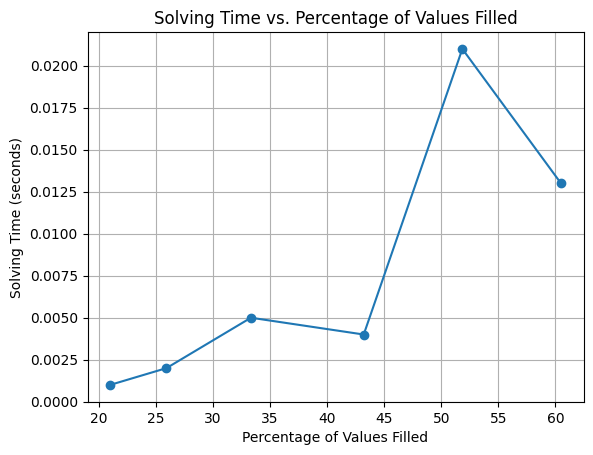

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

class Sudoku:
    '''Sudoku class for solving and generating boards'''

    @classmethod
    def str_board(cls, board):
        '''Returns a board in string format'''
        str_board = ''
        for y in range(len(board)):
            if y in [3, 6]:
                str_board += '- ' * 11 + '\n'
            for x in range(len(board[y])):
                if x in [3, 6]:
                    str_board += '| '
                if x == 8:
                    str_board += str(board[y][x]) + '\n'
                else:
                    str_board += str(board[y][x]) + ' '
        return str_board

    @classmethod
    def find_empty(cls, board):
        '''Find and returns an empty cell if any, else returns None'''
        for y in range(len(board)):
            for x in range(len(board[0])):
                if board[y][x] == 0:
                    return y, x
        return None

    @classmethod
    def valid(cls, board, num, pos):
        '''Returns if a number is valid on a position on the board'''
        for x in range(len(board[0])):
            if board[pos[0]][x] == num and pos[1] != x:
                return False

        for y in range(len(board)):
            if board[y][pos[1]] == num and pos[0] != y:
                return False

        box_y = (pos[0] // 3) * 3
        box_x = (pos[1] // 3) * 3

        for y in range(box_y, box_y + 3):
            for x in range(box_x, box_x + 3):
                if board[y][x] == num and (y, x) != pos:
                    return False

        return True

    @classmethod
    def solve(cls, board):
        '''Solves a given board and returns the board. Returns False if the board is not solvable'''
        find_result = cls.find_empty(board)
        if not find_result:
            return True
        else:
            y, x = find_result

        for num in range(1, 10):
            if Sudoku.valid(board, num, (y, x)):
                board[y][x] = num
                if Sudoku.solve(board):
                    return True
                board[y][x] = 0
        return False

def generate_and_solve_board(size, fill_percentage=0.5):
    '''Generates and solves a Sudoku board with random fill percentage'''
    if size % 3 != 0 or size < 3:
        raise ValueError("Size must be a multiple of 3 and greater than or equal to 3.")

    board = np.zeros((size, size), dtype=int)

    # Fill the main diagonal of each 3x3 subgrid with random numbers
    for i in range(0, size, 3):
        fill_subgrid(board, i)

    # Solve the partially filled board to create a valid Sudoku
    if not Sudoku.solve(board):
        raise ValueError("Failed to generate a valid Sudoku.")

    # Randomly clear certain percentage of the filled boxes
    num_to_clear = int(fill_percentage * size * size)
    for _ in range(num_to_clear):
        i, j = random.randint(0, size - 1), random.randint(0, size - 1)
        while board[i, j] == 0:
            i, j = random.randint(0, size - 1), random.randint(0, size - 1)
        board[i, j] = 0

    # Solve the generated Sudoku using brute force
    brute_force_board = board.copy()
    t1 = time.time()
    Sudoku.solve(brute_force_board)
    t2 = time.time()
    solving_time = round(t2 - t1, 3)
    print(f"Solving time for grid with {fill_percentage * 100}% filled values: {solving_time} seconds")

    return solving_time

def fill_subgrid(board, start_row):
    '''Fills the main diagonal of a 3x3 subgrid with random numbers'''
    numbers = list(range(1, len(board) + 1))
    for i in range(start_row, start_row + 3):
        random.shuffle(numbers)
        for j in range(start_row, start_row + 3):
            board[i, j] = numbers.pop()

# List of percentages of filled values for each Sudoku grid
percentages = [20.99, 25.93, 33.33, 43.21, 51.85, 60.49]

# List to store solving times for each Sudoku grid
solving_times = []

# Generate and solve each Sudoku grid
for fill_percentage in percentages:
    print(f"Solving time for grid: ", end='')
    solving_time = generate_and_solve_board(9, fill_percentage=fill_percentage / 100)
    solving_times.append(solving_time)

# Plot the graph
plt.plot(percentages, solving_times, marker='o')
plt.title('Solving Time vs. Percentage of Values Filled')
plt.xlabel('Percentage of Values Filled')
plt.ylabel('Solving Time (seconds)')
plt.grid(True)
plt.show()


Constraint Propagation


Sudoku Grid:
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
-----------------------
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
-----------------------
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 

Solving time for grid 1: 0.002 seconds

Solved Sudoku using Constraint Propagation:
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
-----------------------
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
-----------------------
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 


Sudoku Grid:
8 0 0 | 0 0 0 | 0 0 0 
0 0 3 | 6 0 0 | 0 0 0 
0 7 0 | 0 9 0 | 0 0 0 
-----------------------
0 5 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 4 5 | 7 0 0 
0 0 0 | 1 0 0 | 0 3 0 
-----------------------
0 0 1 | 0 0 0 | 0 6 8 
0 0 8 | 0 0 0 | 0 1 0 
0 0 0 | 0 0 0 | 4 0 0 

Solving time for grid 2: 0.002 seconds

Solved Sudoku using Constraint Propagation:
8 0 0 | 0 0 0 | 0 0 0 
0 0 3 | 6 0 0

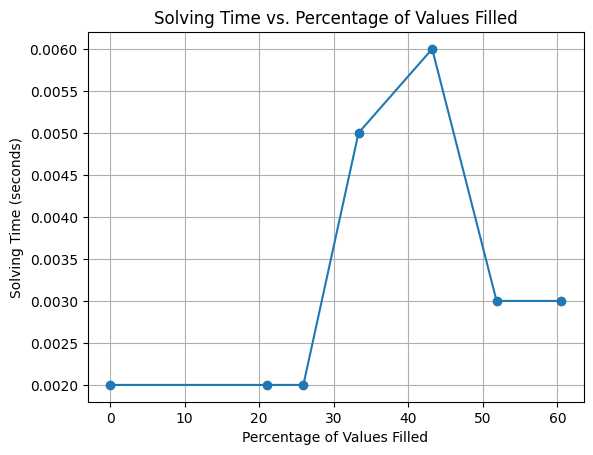

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class SudokuSolver:
    @classmethod
    def str_board(cls, board):
        '''Returns a formatted string representation of the board'''
        str_board = ''
        for i, row in enumerate(board):
            if i > 0 and i % 3 == 0:
                str_board += '-' * (len(board) * 2 + 5) + '\n'
            for j, num in enumerate(row):
                if j > 0 and j % 3 == 0:
                    str_board += '| '
                str_board += f'{num} '
            str_board += '\n'
        return str_board

    @classmethod
    def constraint_propagation(cls, board):
        '''Applies constraint propagation to solve the Sudoku'''
        while True:
            # Check for solved cells
            solved_cells = cls.find_solved_cells(board)
            if not solved_cells:
                break

            # Update board with solved values
            for (i, j, value) in solved_cells:
                board[i, j] = value

    @classmethod
    def find_solved_cells(cls, board):
        '''Finds cells with only one possible value'''
        solved_cells = []
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i, j] == 0:
                    possible_values = cls.find_possible_values(board, i, j)
                    if len(possible_values) == 1:
                        solved_cells.append((i, j, possible_values[0]))
        return solved_cells

    @classmethod
    def find_possible_values(cls, board, row, col):
        '''Finds possible values for a cell'''
        possible_values = set(range(1, len(board) + 1))
        possible_values -= set(board[row, :])
        possible_values -= set(board[:, col])
        subgrid_start_row, subgrid_start_col = 3 * (row // 3), 3 * (col // 3)
        subgrid = board[subgrid_start_row:subgrid_start_row + 3, subgrid_start_col:subgrid_start_col + 3]
        possible_values -= set(subgrid.flatten())
        return list(possible_values)

    @classmethod
    def solve(cls, board):
        '''Solves the Sudoku board using constraint propagation'''
        cls.constraint_propagation(board)
        return board

def solve_and_measure_time(board):
    '''Solves a Sudoku board and measures the time taken'''
    solver = SudokuSolver()
    t1 = time.time()
    solved_board = solver.solve(board)
    t2 = time.time()
    solving_time = round(t2 - t1, 3)
    return solving_time, solved_board

# List of Sudoku grids with different percentages of filled values
grids = [
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 6, 0, 0, 0, 0, 0],
        [0, 7, 0, 0, 9, 0, 0, 0, 0],
        [0, 5, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 6, 0, 0, 0, 0, 0],
        [0, 7, 0, 0, 9, 0, 2, 0, 0],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 5, 0, 0, 0, 1, 0],
        [0, 9, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 5, 0, 0, 0, 1, 0],
        [0, 9, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [5, 2, 1, 0, 0, 0, 0, 6, 8],
        [4, 3, 8, 5, 0, 0, 0, 1, 0],
        [7, 9, 6, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [1, 5, 4, 2, 3, 7, 8, 9, 6],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [5, 2, 1, 0, 0, 0, 0, 6, 8],
        [4, 3, 8, 5, 0, 0, 0, 1, 0],
        [7, 9, 6, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [1, 5, 4, 2, 3, 7, 8, 9, 6],
        [0, 0, 0, 0, 4, 5, 7, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 3, 4],
        [5, 2, 1, 0, 0, 0, 3, 6, 8],
        [4, 3, 8, 5, 0, 0, 9, 1, 7],
        [7, 9, 6, 0, 0, 0, 4, 5, 2]
    ]
]

# List of percentages of filled values for each Sudoku grid
percentages = [0.00, 20.99, 25.93, 33.33, 43.21, 51.85, 60.49]

# Solve each Sudoku grid and measure the time taken
solving_times = []
solved_grids = []
for idx, grid in enumerate(grids):
    sudoku_board = np.array(grid)
    print("\nSudoku Grid:")
    print(SudokuSolver.str_board(sudoku_board))

    # Solve the Sudoku using constraint propagation and measure time
    solving_time, solved_board = solve_and_measure_time(sudoku_board)
    solving_times.append(solving_time)
    solved_grids.append(solved_board)
    print(f"Solving time for grid {idx + 1}: {solving_time} seconds")
    print("\nSolved Sudoku using Constraint Propagation:")
    print(SudokuSolver.str_board(solved_board))

# Plot the line graph
plt.plot(percentages, solving_times, marker='o')
plt.xlabel('Percentage of Values Filled')
plt.ylabel('Solving Time (seconds)')
plt.title('Solving Time vs. Percentage of Values Filled')
plt.grid(True)
plt.show()


Simulated Annealing:

Time taken to solve grid: 0.00010085105895996094 seconds
Time taken to solve grid: 0.06908535957336426 seconds
Time taken to solve grid: 0.060286760330200195 seconds
Time taken to solve grid: 0.07626533508300781 seconds
Time taken to solve grid: 0.07265710830688477 seconds
Time taken to solve grid: 0.07634878158569336 seconds
Time taken to solve grid: 0.1285111904144287 seconds


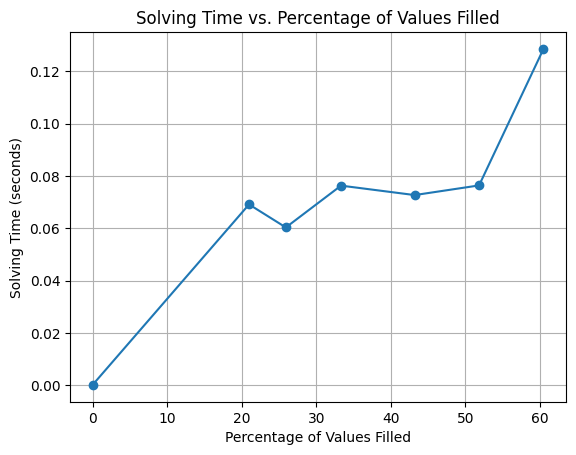

In [ ]:
import numpy as np
from copy import deepcopy
import random
import math
import time
import matplotlib.pyplot as plt

class SudokuSolverSimulatedAnnealing:
    def __init__(self, board):
        self.board = board
        self.size = len(board)
        self.initial_temperature = 100.0
        self.cooling_rate = 0.98
        self.iterations = 1000

    def is_valid_move(self, row, col, num):
        # Check if the number is valid in the row
        if num in self.board[row]:
            return False

        # Check if the number is valid in the column
        if num in [self.board[i][col] for i in range(self.size)]:
            return False

        # Check if the number is valid in the 3x3 subgrid
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(start_row, start_row + 3):
            for j in range(start_col, start_col + 3):
                if self.board[i][j] == num:
                    return False

        return True

    def calculate_energy(self):
        # Calculate the number of conflicts (repeated numbers) in the current board
        energy = 0
        for i in range(self.size):
            for j in range(self.size):
                if self.board[i][j] != 0:
                    num = self.board[i][j]
                    if not self.is_valid_move(i, j, num):
                        energy += 1
        return energy

    def simulated_annealing(self):
        temperature = self.initial_temperature
        current_energy = self.calculate_energy()
        best_energy = current_energy
        best_solution = np.copy(self.board)

        for _ in range(self.iterations):
            if current_energy == 0:
                break

            # Randomly select a cell and try a random number
            row, col = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            original_num = self.board[row][col]
            new_num = random.randint(1, self.size)

            # Skip if the new number is the same as the original number
            if new_num == original_num:
                continue

            # Swap the numbers and calculate new energy
            self.board[row][col] = new_num
            new_energy = self.calculate_energy()
            delta_energy = new_energy - current_energy

            # Accept the move if it improves the solution or according to probability if worse
            if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
                current_energy = new_energy
                if current_energy < best_energy:
                    best_energy = current_energy
                    best_solution = np.copy(self.board)
            else:
                # Revert the move
                self.board[row][col] = original_num

            # Cool down the temperature
            temperature *= self.cooling_rate

        return best_solution

    def solve(self):
        return self.simulated_annealing()

# List of Sudoku grids with different percentages of filled values
grids = [
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 6, 0, 0, 0, 0, 0],
        [0, 7, 0, 0, 9, 0, 0, 0, 0],
        [0, 5, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 6, 0, 0, 0, 0, 0],
        [0, 7, 0, 0, 9, 0, 2, 0, 0],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 5, 0, 0, 0, 1, 0],
        [0, 9, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [0, 0, 1, 0, 0, 0, 0, 6, 8],
        [0, 0, 8, 5, 0, 0, 0, 1, 0],
        [0, 9, 0, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [0, 5, 0, 0, 0, 7, 0, 0, 0],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [5, 2, 1, 0, 0, 0, 0, 6, 8],
        [4, 3, 8, 5, 0, 0, 0, 1, 0],
        [7, 9, 6, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [1, 5, 4, 2, 3, 7, 8, 9, 6],
        [0, 0, 0, 0, 4, 5, 7, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 3, 0],
        [5, 2, 1, 0, 0, 0, 0, 6, 8],
        [4, 3, 8, 5, 0, 0, 0, 1, 0],
        [7, 9, 6, 0, 0, 0, 4, 0, 0]
    ],
    [
        [8, 0, 0, 0, 0, 0, 6, 4, 9],
        [0, 0, 3, 6, 0, 0, 1, 7, 5],
        [0, 7, 0, 0, 9, 0, 2, 8, 3],
        [1, 5, 4, 2, 3, 7, 8, 9, 6],
        [0, 0, 0, 0, 4, 5, 7, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 3, 4],
        [5, 2, 1, 0, 0, 0, 3, 6, 8],
        [4, 3, 8, 5, 0, 0, 9, 1, 7],
        [7, 9, 6, 0, 0, 0, 4, 5, 2]
    ]
    # Add other grids here
]

# List of percentages of filled values for each Sudoku grid
percentages = [0.00, 20.99, 25.93, 33.33, 43.21, 51.85, 60.49]

# List to store solving times for each Sudoku grid
solving_times = []

# Solve each Sudoku grid and measure the time taken
for grid in grids:
    solver = SudokuSolverSimulatedAnnealing(grid)
    start_time = time.time()
    solver.simulated_annealing()
    end_time = time.time()
    solving_time = end_time - start_time
    solving_times.append(solving_time)
    print(f"Time taken to solve grid: {solving_time} seconds")

# Plot the graph
plt.plot(percentages, solving_times, marker='o')
plt.title('Solving Time vs. Percentage of Values Filled')
plt.xlabel('Percentage of Values Filled')
plt.ylabel('Solving Time (seconds)')
plt.grid(True)
plt.show()

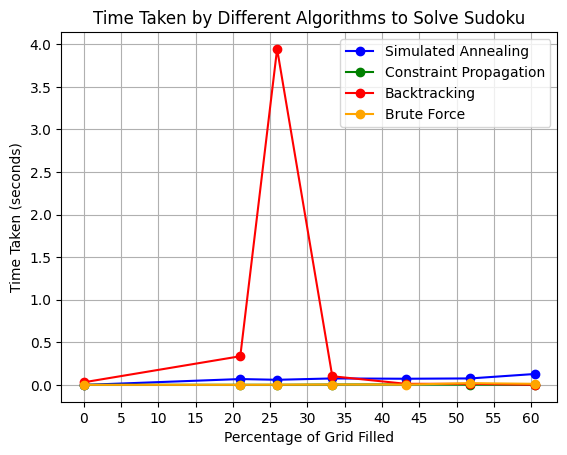

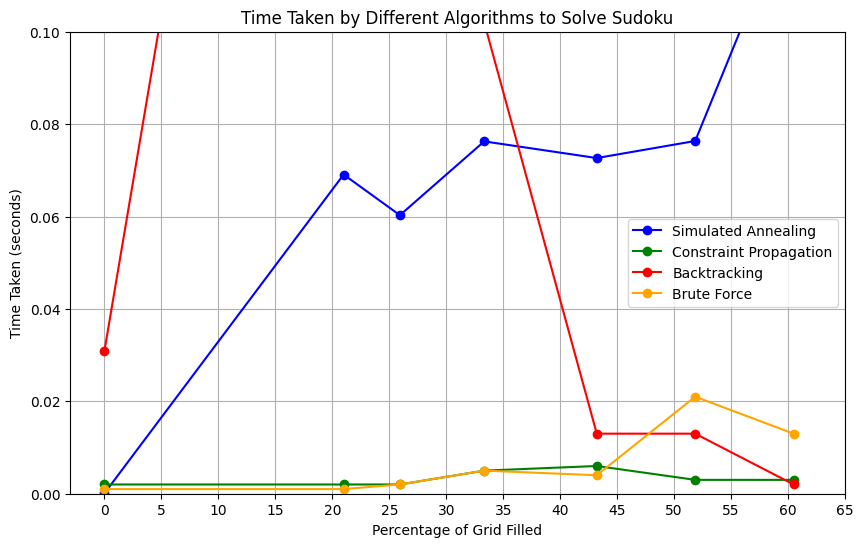

Generating 100 grids, solving with algorithms, plotting graph

Average Time for Backtracking: 0.0071660947799682614 seconds
Average Time for Brute Force: 0.006943168640136718 seconds
Average Time for Constraint Propagation: 0.003496558666229248 seconds
Average Time for Simulated Annealing: 0.9165762877464294 seconds


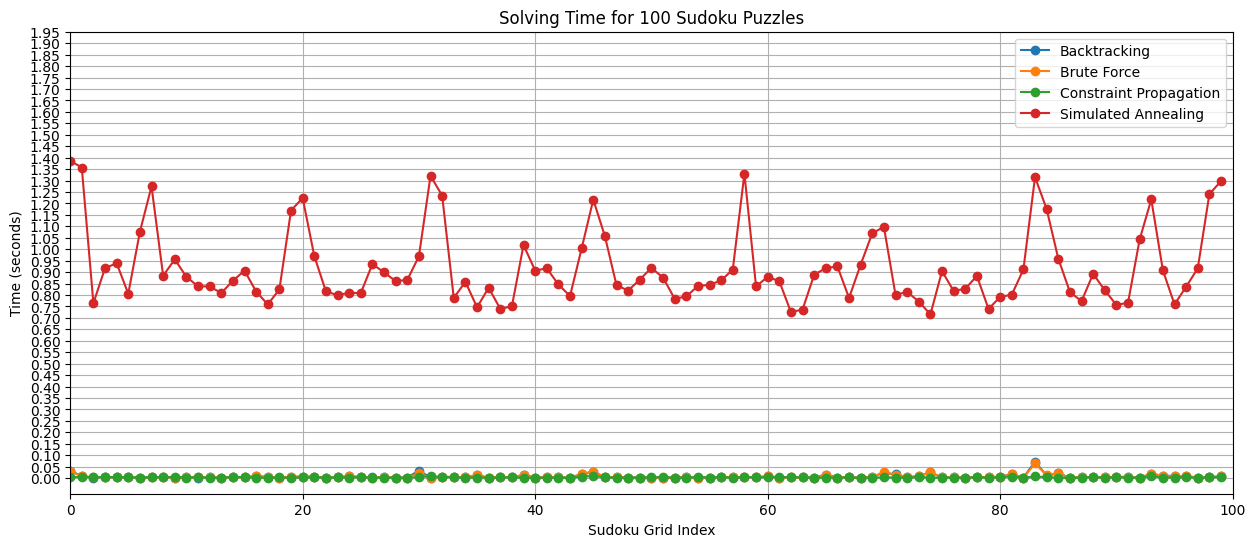

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

class SudokuGenerator:
    @classmethod
    def str_board(cls, board):
        '''Returns a formatted string representation of the board'''
        str_board = ''
        for i, row in enumerate(board):
            if i > 0 and i % 3 == 0:
                str_board += '-' * (len(board) * 2 + 5) + '\n'
            for j, num in enumerate(row):
                if j > 0 and j % 3 == 0:
                    str_board += '| '
                str_board += f'{num} '
            str_board += '\n'
        return str_board

    @classmethod
    def generate_board(cls, size, fill_percentage=0.5):
        '''Generates a Sudoku board with random 50% filled boxes'''
        if size % 3 != 0 or size < 3:
            raise ValueError("Size must be a multiple of 3 and greater than or equal to 3.")

        board = np.zeros((size, size), dtype=int)

        # Fill the main diagonal of each 3x3 subgrid with random numbers
        for i in range(0, size, 3):
            cls.fill_subgrid(board, i)

        # Solve the partially filled board to create a valid Sudoku
        if not cls.solve(board):
            raise ValueError("Failed to generate a valid Sudoku.")

        # Randomly clear 50% of the filled boxes
        num_to_clear = int(fill_percentage * size * size)
        for _ in range(num_to_clear):
            i, j = random.randint(0, size - 1), random.randint(0, size - 1)
            while board[i, j] == 0:
                i, j = random.randint(0, size - 1), random.randint(0, size - 1)
            board[i, j] = 0

        return board

    @classmethod
    def fill_subgrid(cls, board, start_row):
        '''Fills the main diagonal of a 3x3 subgrid with random numbers'''
        numbers = list(range(1, len(board) + 1))
        for i in range(start_row, start_row + 3):
            random.shuffle(numbers)
            for j in range(start_row, start_row + 3):
                board[i, j] = numbers.pop()

    @classmethod
    def solve(cls, board):
        '''Solves the Sudoku board using backtracking'''
        find_result = cls.find_empty(board)
        if find_result is None:
            return True
        else:
            i, j = find_result

        for num in range(1, len(board) + 1):
            if cls.valid(board, num, (i, j)):
                board[i, j] = num
                if cls.solve(board):
                    return True
                board[i, j] = 0

        return False

    @classmethod
    def find_empty(cls, board):
        '''Finds an empty cell on the board'''
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i, j] == 0:
                    return i, j
        return None

    @classmethod
    def valid(cls, board, num, pos):
        '''Checks if placing a number in a position is valid'''
        row, col = pos

        # Check row and column
        if num in board[row, :] or num in board[:, col]:
            return False

        # Check 3x3 subgrid
        subgrid_start_row, subgrid_start_col = 3 * (row // 3), 3 * (col // 3)
        subgrid = board[subgrid_start_row:subgrid_start_row + 3, subgrid_start_col:subgrid_start_col + 3]
        if num in subgrid:
            return False

        return True

    @classmethod
    def constraint_propagation(cls, board):
        '''Applies constraint propagation to solve the Sudoku'''
        while True:
            # Check for solved cells
            solved_cells = cls.find_solved_cells(board)
            if not solved_cells:
                break

            # Update board with solved values
            for (i, j, value) in solved_cells:
                board[i, j] = value

            # Check for conflicting cells
            conflict = cls.find_conflicting_cells(board)
            if conflict:
                raise ValueError("Sudoku puzzle is unsolvable.")

    @classmethod
    def find_solved_cells(cls, board):
        '''Finds cells with only one possible value'''
        solved_cells = []
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i, j] == 0:
                    possible_values = cls.find_possible_values(board, i, j)
                    if len(possible_values) == 1:
                        solved_cells.append((i, j, possible_values[0]))
        return solved_cells

    @classmethod
    def find_possible_values(cls, board, row, col):
        '''Finds possible values for a cell'''
        possible_values = set(range(1, len(board) + 1))
        possible_values -= set(board[row, :])
        possible_values -= set(board[:, col])
        subgrid_start_row, subgrid_start_col = 3 * (row // 3), 3 * (col // 3)
        subgrid = board[subgrid_start_row:subgrid_start_row + 3, subgrid_start_col:subgrid_start_col + 3]
        possible_values -= set(subgrid.flatten())
        return list(possible_values)

    @classmethod
    def find_conflicting_cells(cls, board):
        '''Finds conflicting cells in the Sudoku'''
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i, j] == 0:
                    possible_values = cls.find_possible_values(board, i, j)
                    if len(possible_values) == 0:
                        return (i, j)
        return None

# Function to solve Sudoku puzzle using constraint propagation and measure time
def solve_sudoku_constraint_propagation(board):
    start_time = time.time()
    SudokuGenerator.constraint_propagation(board)
    end_time = time.time()
    return end_time - start_time

# Function to solve Sudoku puzzle using backtracking and measure time
def solve_sudoku_backtracking(board):
    start_time = time.time()
    SudokuGenerator.solve(board)
    end_time = time.time()
    return end_time - start_time

# Function to solve Sudoku puzzle using brute force and measure time
def solve_sudoku_brute_force(board):
    start_time = time.time()
    SudokuGenerator.solve(board)
    end_time = time.time()
    return end_time - start_time


def solve_brute_force(board, empty_cells, index):
    if index == len(empty_cells):
        return True

    row, col = empty_cells[index]

    for num in range(1, len(board) + 1):
        if valid(board, num, (row, col)):
            board[row, col] = num
            if solve_brute_force(board, empty_cells, index + 1):
                return True
            board[row, col] = 0

    return False

def find_empty_cells(board):
    empty_cells = []
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i, j] == 0:
                empty_cells.append((i, j))
    return empty_cells


# Function to generate a neighboring state for simulated annealing
def generate_neighbor(board):
    neighbor_board = board.copy()
    # Randomly select a cell to modify
    i, j = random.randint(0, len(board)-1), random.randint(0, len(board)-1)
    # Randomly select a new value for the cell
    new_value = random.randint(1, len(board))
    neighbor_board[i, j] = new_value
    return neighbor_board

# Function to evaluate the quality of a state for simulated annealing
def evaluate_sudoku(board):
    # Count the number of conflicts in the Sudoku board
    conflicts = 0
    for i in range(len(board)):
        for j in range(len(board)):
            if board[i, j] != 0:
                # Check row and column conflicts
                conflicts += board[i, j] in board[i, :] or board[i, j] in board[:, j]
                # Check 3x3 subgrid conflicts
                subgrid_start_row, subgrid_start_col = 3 * (i // 3), 3 * (j // 3)
                subgrid = board[subgrid_start_row:subgrid_start_row + 3, subgrid_start_col:subgrid_start_col + 3]
                conflicts += board[i, j] in subgrid.flatten()
    return conflicts

# Function to update temperature for simulated annealing
def update_temperature(temperature, iteration):
    return temperature * cooling_rate

# Function to solve Sudoku puzzle using simulated annealing and measure time
def solve_sudoku_simulated_annealing(board, initial_temperature, final_temperature, cooling_rate):
    start_time = time.time()
    current_state = board.copy()
    current_energy = evaluate_sudoku(board)
    temperature = initial_temperature
    iteration = 0
    while temperature > final_temperature:
        # Generate a neighboring state
        neighbor_state = generate_neighbor(current_state)
        neighbor_energy = evaluate_sudoku(neighbor_state)
        # Calculate energy difference
        energy_difference = neighbor_energy - current_energy
        if energy_difference < 0 or random.random() < np.exp(-energy_difference / temperature):
            current_state = neighbor_state
            current_energy = neighbor_energy
        # Update temperature
        temperature = update_temperature(temperature, iteration)
        iteration += 1
    end_time = time.time()
    return end_time - start_time

# Define parameters for simulated annealing
initial_temperature = 1000
final_temperature = 0.1
cooling_rate = 0.99

# Generate 100 Sudoku puzzles and measure time for each algorithm
solving_times_backtracking = []
solving_times_brute_force = []
solving_times_constraint_propagation = []
solving_times_simulated_annealing = []

for _ in range(100):
    sudoku_board = SudokuGenerator.generate_board(9, fill_percentage=0.5)

    solving_time_backtracking = solve_sudoku_backtracking(sudoku_board.copy())
    solving_times_backtracking.append(solving_time_backtracking)

    solving_time_brute_force = solve_sudoku_brute_force(sudoku_board.copy())
    solving_times_brute_force.append(solving_time_brute_force)

    solving_time_constraint_propagation = solve_sudoku_constraint_propagation(sudoku_board.copy())
    solving_times_constraint_propagation.append(solving_time_constraint_propagation)

    solving_time_simulated_annealing = solve_sudoku_simulated_annealing(sudoku_board.copy(), initial_temperature, final_temperature, cooling_rate)
    solving_times_simulated_annealing.append(solving_time_simulated_annealing)

# Calculate the average time for each algorithm
average_time_backtracking = np.mean(solving_times_backtracking)
average_time_brute_force = np.mean(solving_times_brute_force)
average_time_constraint_propagation = np.mean(solving_times_constraint_propagation)
average_time_simulated_annealing = np.mean(solving_times_simulated_annealing)

# Print the average times
print("Average Time for Backtracking:", average_time_backtracking, "seconds")
print("Average Time for Brute Force:", average_time_brute_force, "seconds")
print("Average Time for Constraint Propagation:", average_time_constraint_propagation, "seconds")
print("Average Time for Simulated Annealing:", average_time_simulated_annealing, "seconds")


# Example data (replace with your own)
x_values = np.arange(100)  # Assuming you have 100 Sudoku puzzles
y_values_backtracking = solving_times_backtracking
y_values_brute_force = solving_times_brute_force
y_values_constraint_propagation = solving_times_constraint_propagation
y_values_simulated_annealing = solving_times_simulated_annealing

# Create a figure with a larger size
plt.figure(figsize=(15, 6))

# Create the plot
plt.plot(x_values, y_values_backtracking, label='Backtracking', marker='o', linestyle='-')
plt.plot(x_values, y_values_brute_force, label='Brute Force', marker='o', linestyle='-')
plt.plot(x_values, y_values_constraint_propagation, label='Constraint Propagation', marker='o', linestyle='-')
plt.plot(x_values, y_values_simulated_annealing, label='Simulated Annealing', marker='o', linestyle='-')

# Set x-axis limits to cover the range from 0 to 1 second
plt.xlim(0, 100)  # Adjust the limits as needed

# Set y-axis ticks
plt.yticks(np.arange(0, 2.000, 0.050))

# Add labels and title
plt.xlabel('Sudoku Grid Index')
plt.ylabel('Time (seconds)')
plt.title('Solving Time for 100 Sudoku Puzzles')
plt.legend()
plt.grid(True)
plt.show()